## 作業
### 請根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

%matplotlib inline
plt.style.use('ggplot')

# 設定 data_path
dir_data = './data/'

C:\Users\TL_Yu\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 將生日轉為年齡區間
app_train['AGE'] = abs(app_train['DAYS_BIRTH'])/365
age_data = app_train.loc[:,['TARGET','AGE']].copy()

# Continous to Discrete
age_data['AGE_BINNED'] = pd.cut(age_data['AGE'],
                               bins = np.linspace(20,70,num=11))
age_data.head()

,TARGET,AGE,AGE_BINNED
0,1,25.920548,"(25.0, 30.0]"
1,0,45.931507,"(45.0, 50.0]"
2,0,52.180822,"(50.0, 55.0]"
3,0,52.068493,"(50.0, 55.0]"
4,0,54.608219,"(50.0, 55.0]"


In [4]:
age_group_sorted = np.sort(age_data['AGE_BINNED'].unique())
age_group_sorted

array([Interval(20.0, 25.0, closed='right'),
       Interval(25.0, 30.0, closed='right'),
       Interval(30.0, 35.0, closed='right'),
       Interval(35.0, 40.0, closed='right'),
       Interval(40.0, 45.0, closed='right'),
       Interval(45.0, 50.0, closed='right'),
       Interval(50.0, 55.0, closed='right'),
       Interval(55.0, 60.0, closed='right'),
       Interval(60.0, 65.0, closed='right'),
       Interval(65.0, 70.0, closed='right')], dtype=object)

C:\Users\TL_Yu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


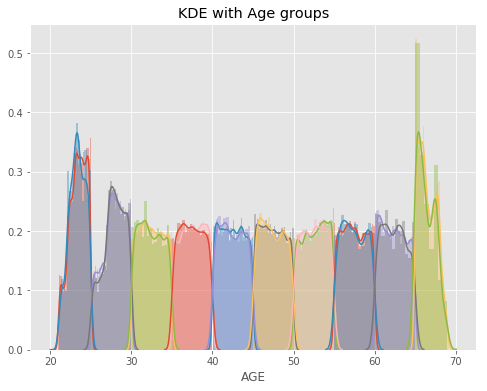

In [5]:
plt.figure(figsize=(8,6))
for i in range(len(age_group_sorted)):
    sns.distplot(age_data.loc[(age_data['AGE_BINNED']==age_group_sorted[i]) & (age_data['TARGET']==0), 'AGE'], label = str(age_group_sorted[i]))
    sns.distplot(age_data.loc[(age_data['AGE_BINNED']==age_group_sorted[i]) & (age_data['TARGET']==1), 'AGE'], label = str(age_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

# Subplot
plt.subplot(row, column, idx)

大圖的規格是(row * column，並將小圖放在idx的位置)

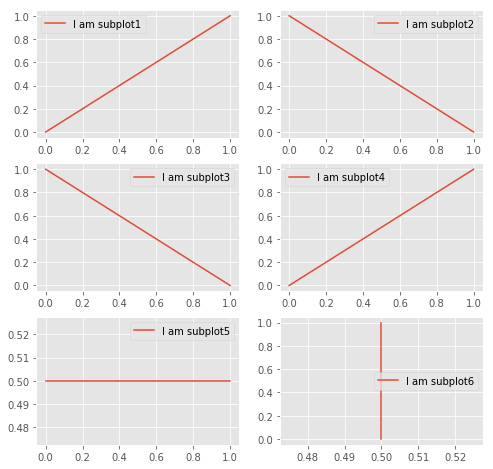

In [6]:
plt.figure(figsize=(8,8))

plt.subplot(3,2,1)
plt.plot([0,1],[0,1], label = 'I am subplot1')
plt.legend()

plt.subplot(3,2,2)
plt.plot([0,1],[1,0], label = 'I am subplot2')
plt.legend()

plt.subplot(3,2,3)
plt.plot([1,0],[0,1], label = 'I am subplot3')
plt.legend()

plt.subplot(3,2,4)
plt.plot([1,0],[1,0], label = 'I am subplot4')
plt.legend()

plt.subplot(3,2,5)
plt.plot([0,1],[0.5,0.5], label = 'I am subplot5')
plt.legend()

plt.subplot(3,2,6)
plt.plot([0.5,0.5],[0,1], label = 'I am subplot6')
plt.legend()

plt.show()

C:\Users\TL_Yu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


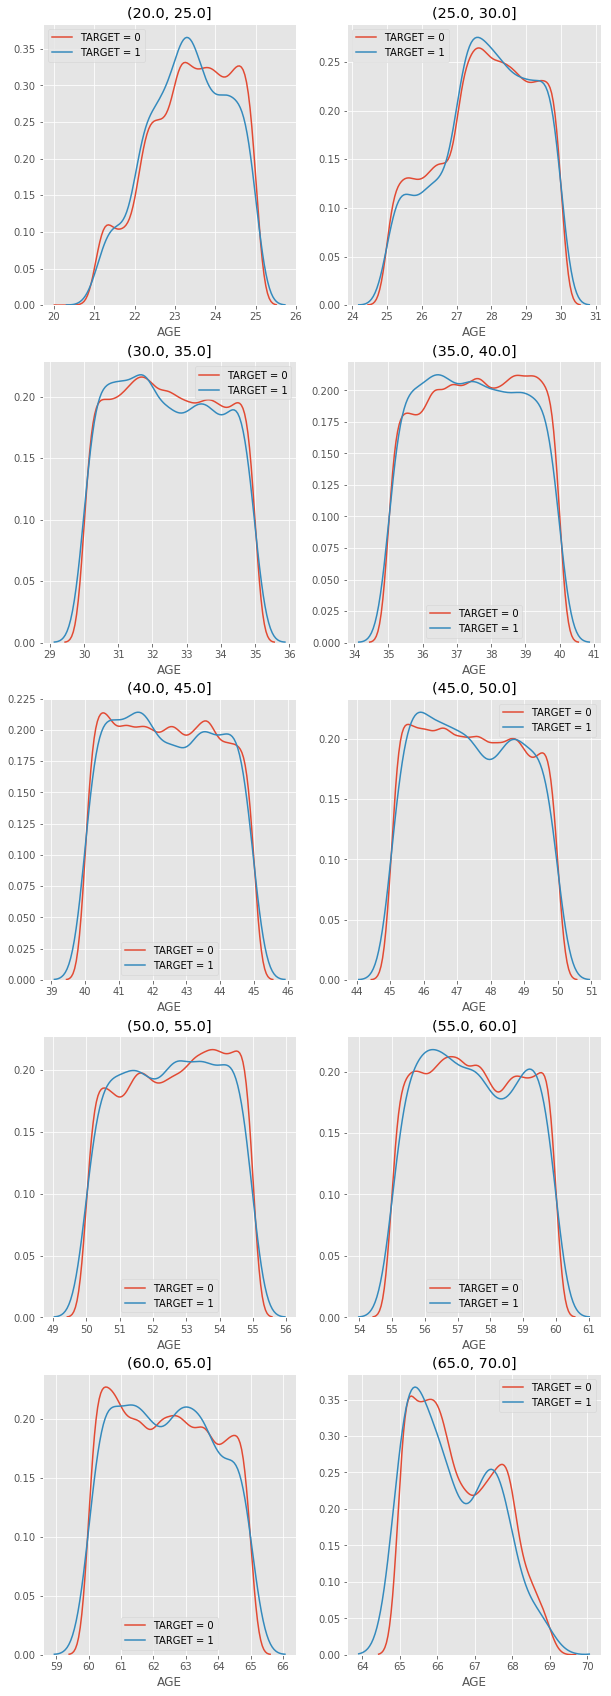

In [7]:
# use subplot to divide them
nrows = 5
ncols = 2

plt.figure(figsize=(10,30))
for i in range(len(age_group_sorted)):
    plt.subplot(nrows, ncols, i+1)
    sns.distplot(age_data.loc[(age_data['AGE_BINNED'] == age_group_sorted[i]) & (age_data['TARGET'] == 0), 'AGE'], 
                 label = "TARGET = 0", hist = False)
    sns.distplot(age_data.loc[(age_data['AGE_BINNED'] == age_group_sorted[i]) & (age_data['TARGET'] == 1), 'AGE'], 
                 label = "TARGET = 1", hist = False)
    plt.title(str(age_group_sorted[i]))
plt.show()    

# 作業
請根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

In [8]:
app_train.HOUSETYPE_MODE.unique()

array(['block of flats', nan, 'terraced house', 'specific housing'],
      dtype=object)

In [9]:
# 將遺漏值轉為字串'na'才能繪出圖形
app_train.loc[app_train['HOUSETYPE_MODE'].isna(), 'HOUSETYPE_MODE'] = 'na'
unique_house_type = app_train.HOUSETYPE_MODE.unique()
unique_house_type

array(['block of flats', 'na', 'terraced house', 'specific housing'],
      dtype=object)

C:\Users\TL_Yu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


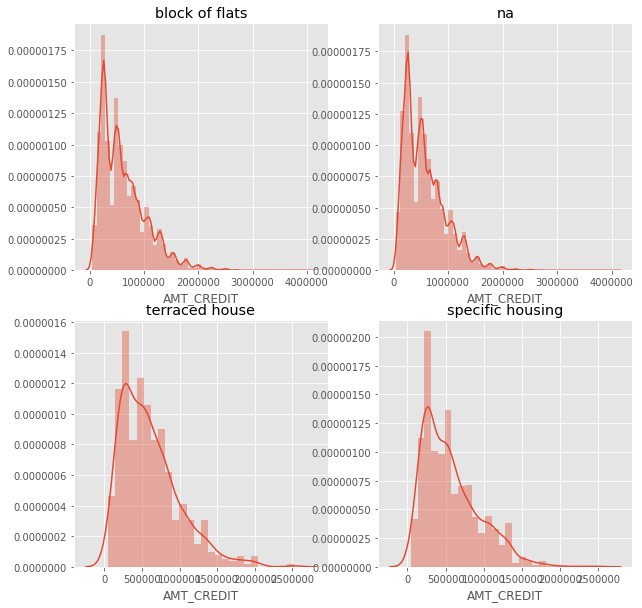

In [10]:
nrows = 2
ncols = len(unique_house_type)/nrows

plt.figure(figsize=(10,10))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)
    sns.distplot(app_train.loc[app_train['HOUSETYPE_MODE'] == unique_house_type[i], 'AMT_CREDIT'])
    plt.title(str(unique_house_type[i]))
plt.show()    